In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (7.5, 7.5)

# Q1: K-Means Algorithm

In [4]:
# Read data
x, y, z = np.loadtxt("alpha_shape.csv", delimiter=",", unpack=True, skiprows=1)
X = np.vstack((x, y, z)).T

## 1a.)

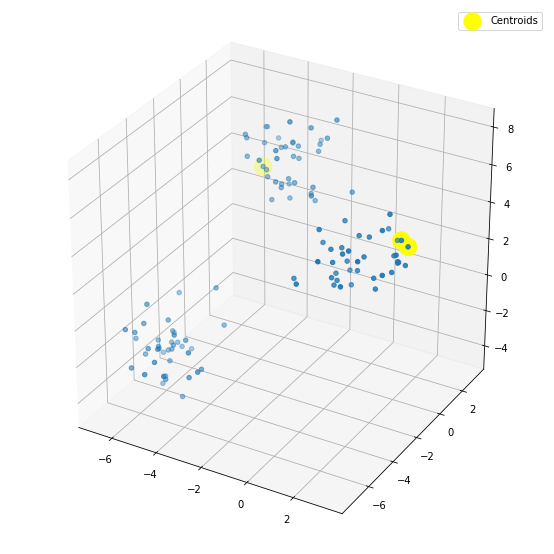

In [5]:
# Number of clusters
K = 3

# Number of training examples
m = len(x)

# Initialize centroids randomly
Centroids = np.array([]).reshape(3,0) 
for i in range(K): 
    rand = random.randint(0,m-1)
    Centroids = np.c_[Centroids,X[rand]]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x, y, z)
ax.scatter3D(Centroids[0,:],Centroids[1,:],Centroids[2,:],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

## 1b.)

In [6]:
# Number of iterations
num_iter = 5

# Main K-means loop
for n in range(num_iter): 

    print("Current Iteration = " + str(n+1))
    # Step 1: Determine distances from each centroid for each training data
    EuclideanDistance = np.array([]).reshape(m,0) 
    
    for k in range(K):
        dists = np.sum((X-Centroids[:,k])**2, axis=1)
        EuclideanDistance = np.c_[EuclideanDistance, dists]

    # Step 2: Determine the index that has the minimum distance for each training data
    C = np.argmin(EuclideanDistance,axis=1) + 1
    print("Labels:")
    print(C) 

    # Step 3: Initialize dictionary to store (x,y,z) coordinates for each point
    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(3,0)
    
    # Step 4: Assign training data to clusters index defined in Step 2
    for i in range(m):
        Y[C[i]] = np.c_[Y[C[i]],X[i]]
    
    # Change shape of dictionary values
    for k in range(K):
        Y[k+1] = Y[k+1].T  
        
    # Step 5: Update our centroids based on mean of the cluster
    for k in range(K):
        Centroids[:,k] = np.mean(Y[k+1],axis=0)
    print("Centroids:")
    print(Centroids)
    print("\n")


Current Iteration = 1
Labels:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 2 2 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2
 1 1 2 1 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3]
Centroids:
[[ 1.11171222  2.69314379 -4.25435813]
 [-2.27553307 -1.91505706 -1.98672526]
 [ 3.72610017  3.3906441   1.72650059]]


Current Iteration = 2
Labels:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 2 1 1 2 1 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 2
 1 1 2 1 2 2 3 1 3 1 1 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 3 3 1 3 3 1 3
 3 3 3 1 3 3 3 1 3]
Centroids:
[[ 0.01488882  2.67217889 -4.57377236]
 [-1.50741909 -1.62171542 -2.40619908]
 [ 4.27270849  3.87839777  1.08303041]]


Current Iteration = 3
Labels:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 2 1 2 2 1 2 2 1 1 2 2 1 1 2 2 1 2 2 2 1 2 1 2 2 2 1 2 1 2 2
 1 1 2 1

## 1c.)

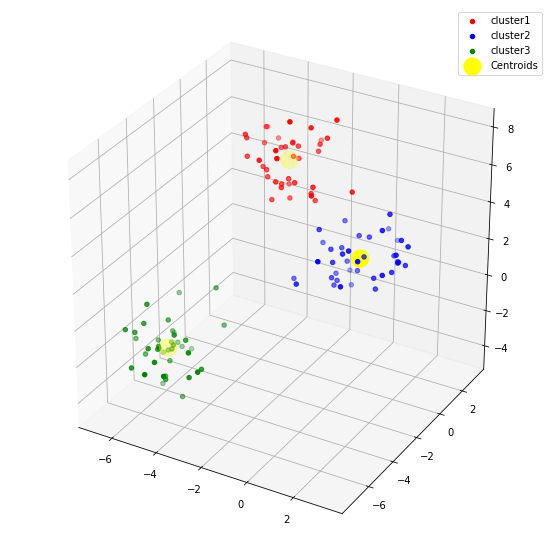

In [7]:
fig = plt.figure()
ax = Axes3D(fig)

color=['red','blue','green','cyan','magenta','yellow','orange','purple']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8']

for k in range(K):
    ax.scatter3D(Y[k+1][:,0],Y[k+1][:,1],Y[k+1][:,2],c=color[k],label=labels[k])
    
ax.scatter3D(Centroids[0,:],Centroids[1,:],Centroids[2,:],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()

In [8]:
xInterval = np.linspace(x.min(), x.max(), 100, endpoint=True)
yInterval = np.linspace(y.min(), y.max(), 100, endpoint=True)
zInterval = np.linspace(z.min(), z.max(), 100, endpoint=True)

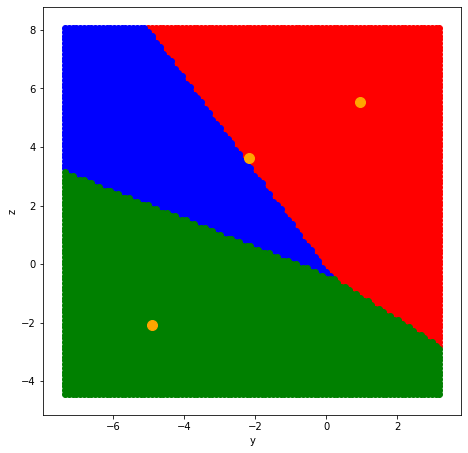

In [9]:
xMean = np.mean(x)
yy, zz = np.meshgrid(yInterval, zInterval)
cluster_id = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        dist = np.sum([(xMean-Centroids[0,:])**2, (yy[i,j]-Centroids[1,:])**2, (zz[i,j]-Centroids[2,:])**2], axis=0)
        cluster_id[i, j] = np.argmin(dist)

for k in range(K):
    plt.scatter(yy[cluster_id==k], zz[cluster_id==k], c=color[k], label=labels[k])
plt.scatter(Centroids[1,:], Centroids[2,:], s=100, c='orange', label='Centroids')
plt.xlabel("y")
plt.ylabel("z")
plt.show()

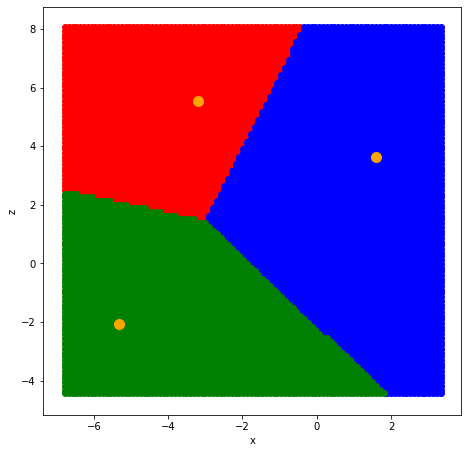

In [10]:
yMean = np.mean(y)
xx, zz = np.meshgrid(xInterval, zInterval)
cluster_id = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        dist = np.sum([(yMean-Centroids[1,:])**2, (xx[i,j]-Centroids[0,:])**2, (zz[i,j]-Centroids[2,:])**2], axis=0)
        cluster_id[i, j] = np.argmin(dist)

for k in range(K):
    plt.scatter(xx[cluster_id==k], zz[cluster_id==k], c=color[k], label=labels[k])
plt.scatter(Centroids[0,:], Centroids[2,:], s=100, c='orange', label='Centroids')
plt.xlabel("x")
plt.ylabel("z")
plt.show()

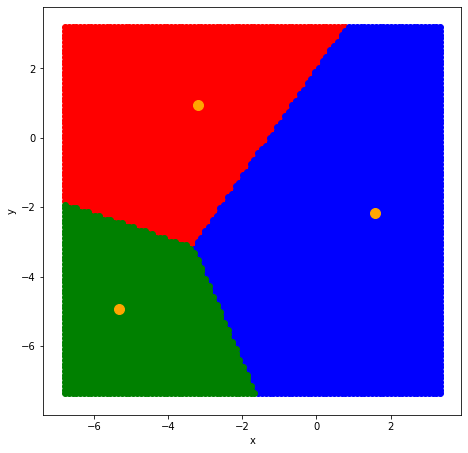

In [11]:
zMean = np.mean(z)
xx, yy = np.meshgrid(xInterval, yInterval)
cluster_id = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        dist = np.sum([(zMean-Centroids[2,:])**2, (xx[i,j]-Centroids[0,:])**2, (yy[i,j]-Centroids[1,:])**2], axis=0)
        cluster_id[i, j] = np.argmin(dist)

for k in range(K):
    plt.scatter(xx[cluster_id==k], yy[cluster_id==k], c=color[k], label=labels[k])
plt.scatter(Centroids[0,:], Centroids[1,:], s=100, c='orange', label='Centroids')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 1d.)

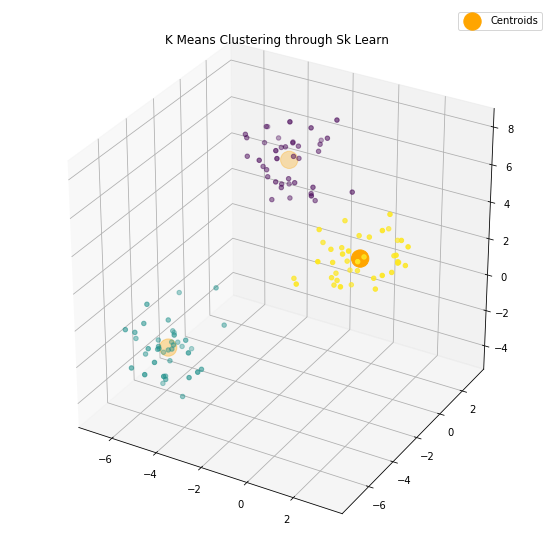

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
Centroids = np.transpose(kmeans.cluster_centers_)
Score = kmeans.score(X)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x, y, z, c=labels)
ax.scatter3D(Centroids[0,:], Centroids[1,:], Centroids[2,:], s=300,c='orange',label='Centroids')
plt.legend()
plt.title('K Means Clustering through Sk Learn')
plt.show()

## 1e.)

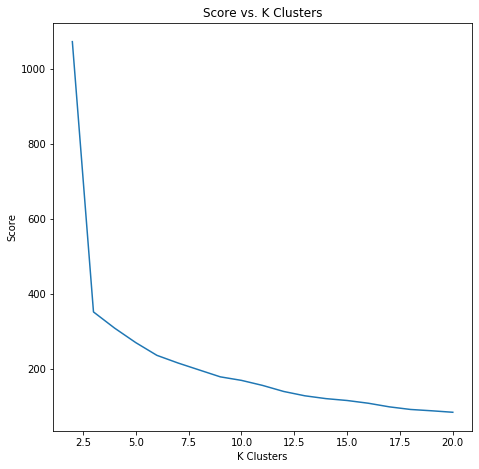

In [15]:
Score = []
clusters = []
plt.figure()
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(X)
    Score.append(-kmeans.score(X))
    clusters.append(i+1)
plt.xlabel('K Clusters')
plt.ylabel('Score')
plt.plot(clusters, Score)
plt.title('Score vs. K Clusters')
plt.show()

## Discussion
Looking at the graph above, it looks like designating 3 clusters is enough to bring the model's efficacy to about 75%. For the sake of computational time, keeping cluster number below 5 seems to be a good choice since it brings the clustering efficacy to about 80%. Percentage are approximated by looking at y-axis ticks.

# Q2: Clustering Algorithms

In [232]:
# Read data
data_a = np.loadtxt("data_a.txt", delimiter=" ", unpack=True).T
data_b = np.loadtxt("data_b.txt", delimiter=" ", unpack=True).T
data_c = np.loadtxt("data_c.txt", delimiter=" ", unpack=True).T

## 2a: Spectral Clustering from scratch

In [390]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans


def weightedAffinity(data, sig):
    # W_test = rbf_kernel(data, data, gamma=1/sig**2) 
    # ^^ This is a faster function that does the same thing as the nested loop below, but not sure if we can use it...
    m = len(data)
    W = np.empty((m, m))
    for i in range(m):
        for j in range(m):
            W[i, j] = np.exp(-np.linalg.norm(data[i]-data[j])**2/sig**2)
    
    return W

def diagonalMatrix(W):
    return np.diag((np.sum(W, axis=0))**-0.5)

def laplacianMatrix(D, W):
    return np.eye(len(W)) - D @ W @ D
    

In [374]:
W_a = weightedAffinity(data_a, sig=0.7)

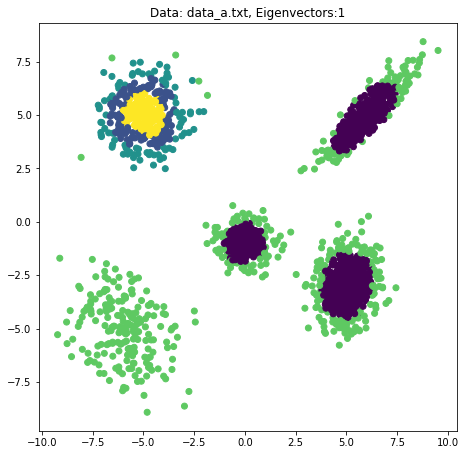

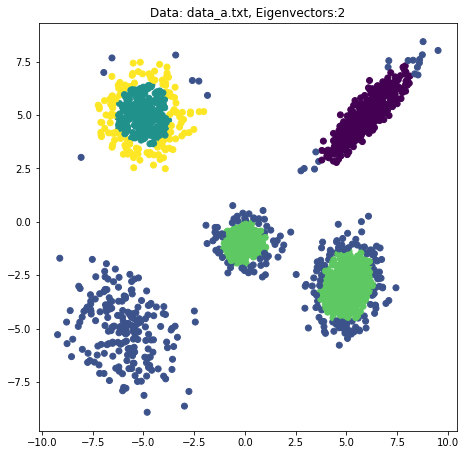

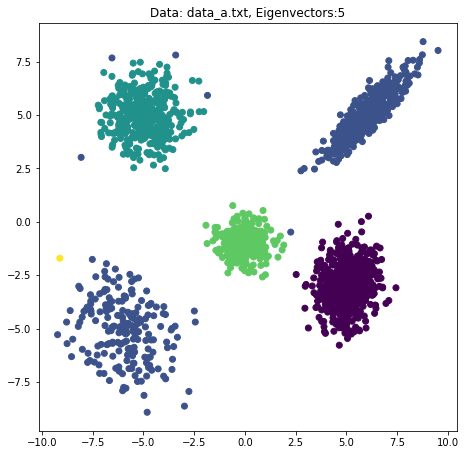

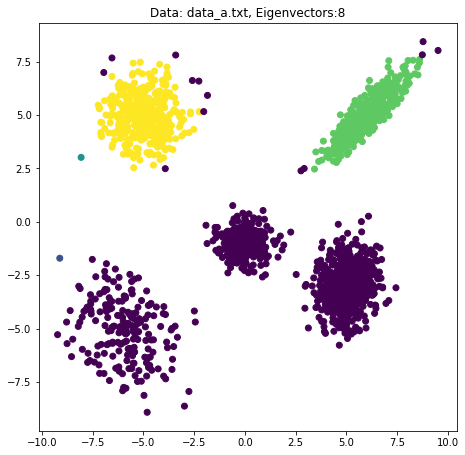

In [394]:
D_a = diagonalMatrix(W_a)
L_a = laplacianMatrix(D_a, W_a)
_, v_a = np.linalg.eigh(L_a)
evec = [1, 2, 5, 8]
for i in evec:
    clustering = KMeans(n_clusters=5, random_state=0).fit(np.real(v_a[:,1:i+1].reshape(len(v_a), i)))
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    plt.figure()
    plt.title("Data: data_a.txt, Eigenvectors:" + str(i))
    plt.scatter(data_a[:, 0], data_a[:, 1], c=labels)
    plt.scatter
    plt.show()

In [376]:
W_b = weightedAffinity(data_b, sig=0.7)

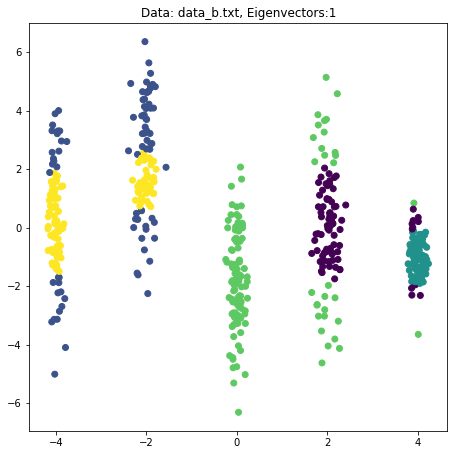

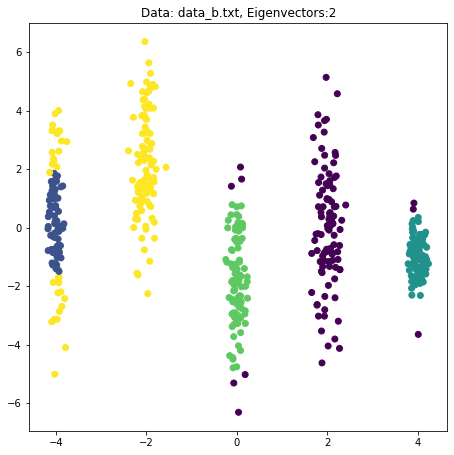

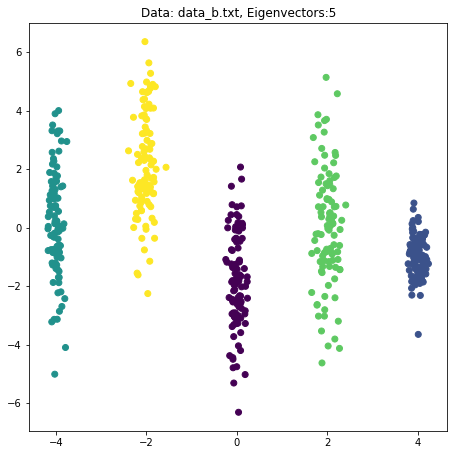

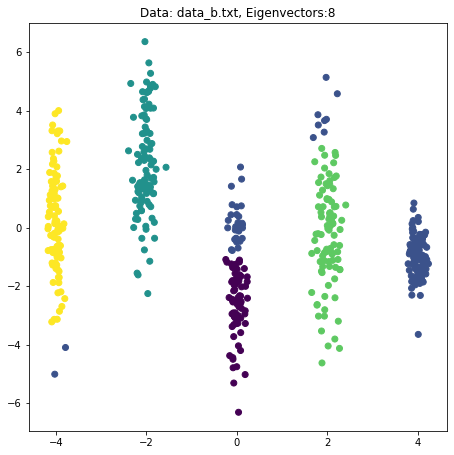

In [393]:
D_b = diagonalMatrix(W_b)
L_b = laplacianMatrix(D_b, W_b)
_, v_b = np.linalg.eigh(L_b)
evec = [1, 2, 5, 8]
for i in evec:
    clustering = KMeans(n_clusters=5, random_state=0).fit(np.real(v_b[:,1:i+1].reshape(len(v_b), i)))
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    plt.figure()
    plt.title("Data: data_b.txt, Eigenvectors:" + str(i))
    plt.scatter(data_b[:, 0], data_b[:, 1], c=labels)
    plt.scatter
    plt.show()

In [378]:
W_c = weightedAffinity(data_c, sig=0.7)

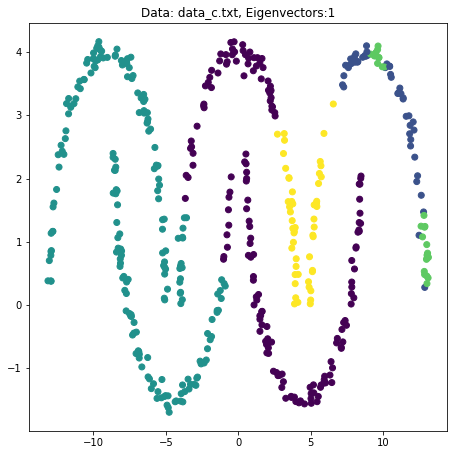

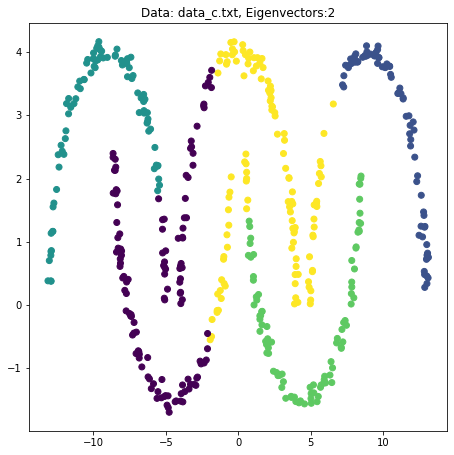

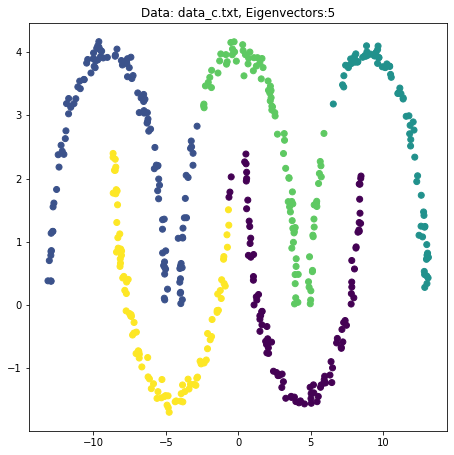

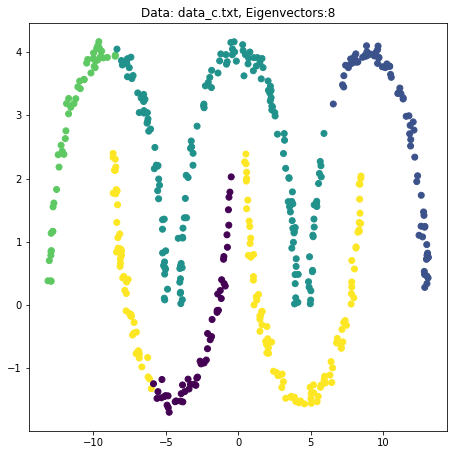

In [392]:
D_c = diagonalMatrix(W_c)
L_c = laplacianMatrix(D_c, W_c)
_, v_c = np.linalg.eigh(L_c)
evec = [1, 2, 5, 8]
for i in evec:
    clustering = KMeans(n_clusters=5, random_state=0).fit(np.real(v_c[:,1:i+1].reshape(len(v_c), i)))
    labels = clustering.labels_
    centroids = clustering.cluster_centers_
    plt.figure()
    plt.title("Data: data_c.txt, Eigenvectors:" + str(i))
    plt.scatter(data_c[:, 0], data_c[:, 1], c=labels)
    plt.scatter
    plt.show()

## Ranking for # of eigenvectors: <br>
Data Set A: 5 > (1 == 2 == 8) <br>
Data Set B: 5 > 8 > 2 > 1 <br>
Data Set C: 5 > 2 > 8 > 1

## 2b: Spectral Clustering using sklearn

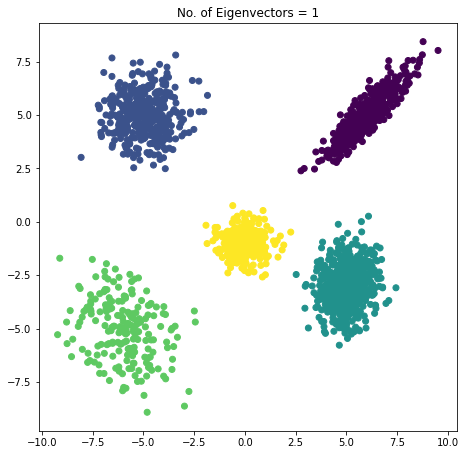

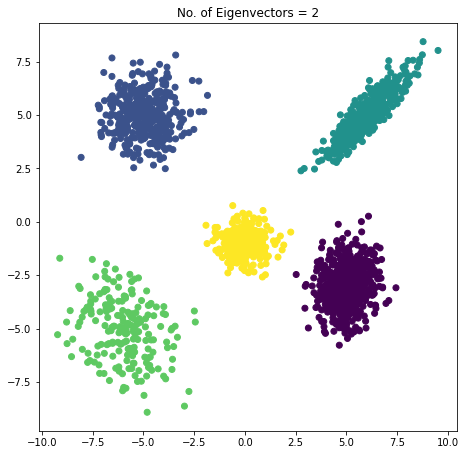

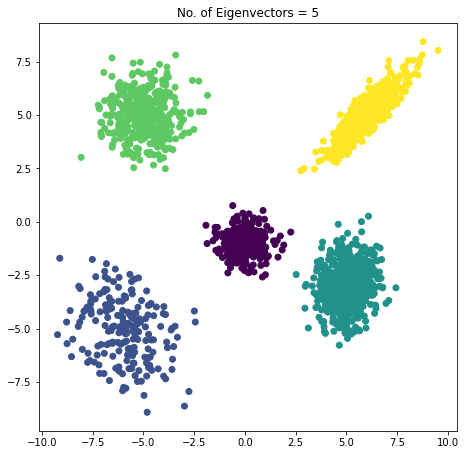

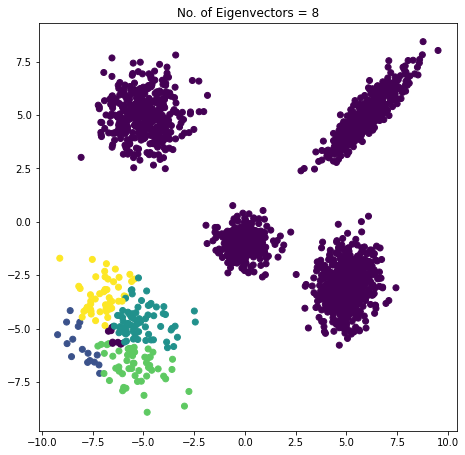

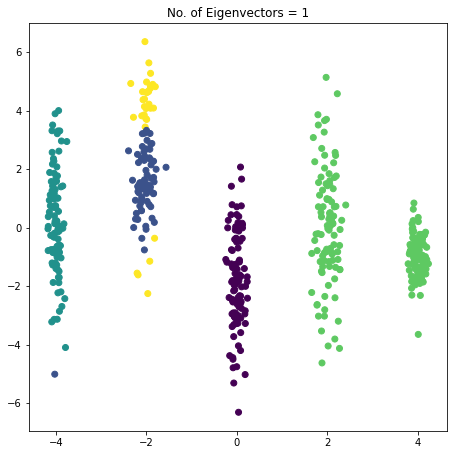

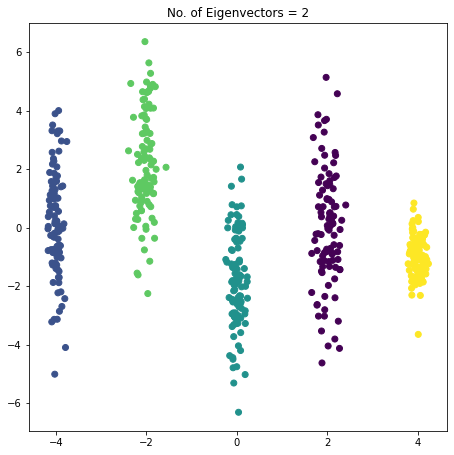

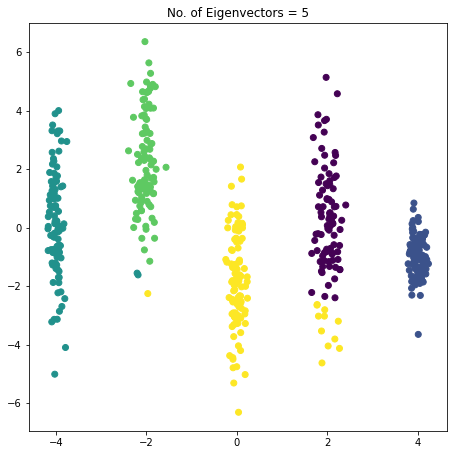

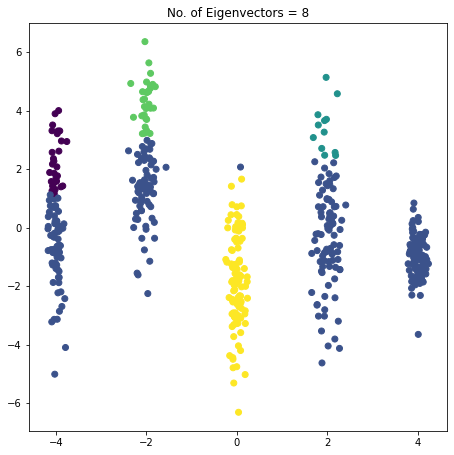

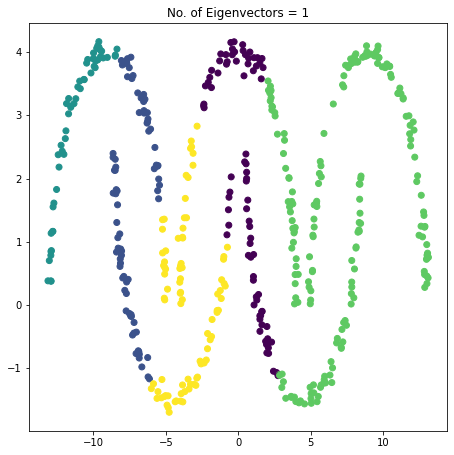

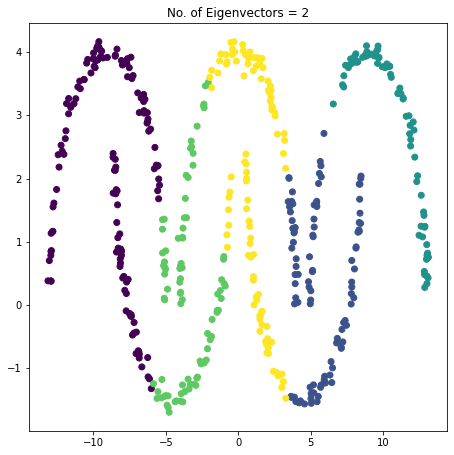

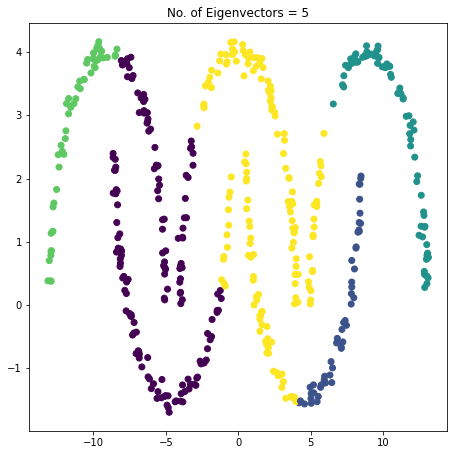

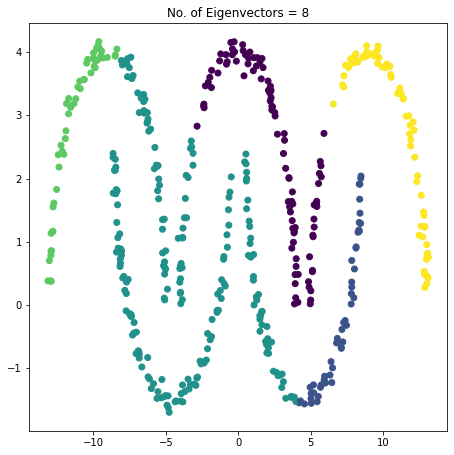

In [391]:
from sklearn.cluster import SpectralClustering
evec = [1, 2, 5, 8]
for i in evec:
    clustering = SpectralClustering(n_clusters=5, n_components=i, affinity="rbf").fit(data_a)
    labels = clustering.labels_
    plt.figure()
    plt.title("No. of Eigenvectors = {}".format(i))
    plt.scatter(data_a[:, 0], data_a[:, 1], c=labels)
    plt.show()
for i in evalues:
    clustering = SpectralClustering(n_clusters=5, n_components=i, affinity="rbf").fit(data_b)
    labels = clustering.labels_
    plt.figure()
    plt.title("No. of Eigenvectors = {}".format(i))
    plt.scatter(data_b[:, 0], data_b[:, 1], c=labels)
    plt.show()
for i in evalues:
    clustering = SpectralClustering(n_clusters=5, n_components=i, affinity="rbf").fit(data_c)
    labels = clustering.labels_
    plt.figure()
    plt.title("No. of Eigenvectors = {}".format(i))
    plt.scatter(data_c[:, 0], data_c[:, 1], c=labels)
    plt.show()

## Ranking for # of eigenvectors: <br>
Data Set A: (1 == 2 == 5) > 8 <br>
Data Set B: 2 > 5 > 1 > 8 <br>
Data Set C: (1 == 2 == 5) > 8; where 1, 2, 5 are somewhat equally bad, but 8 is significantly worse

## 2c: K-Means using sklearn

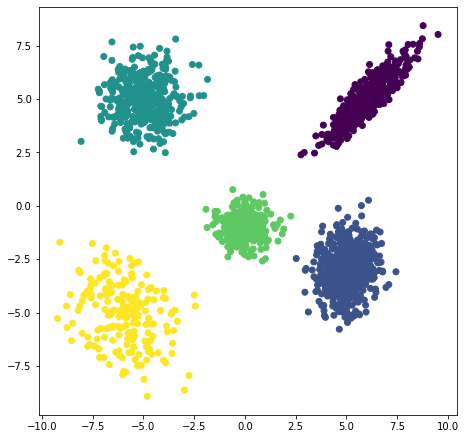

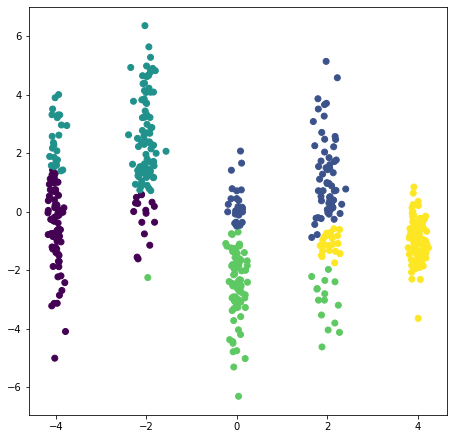

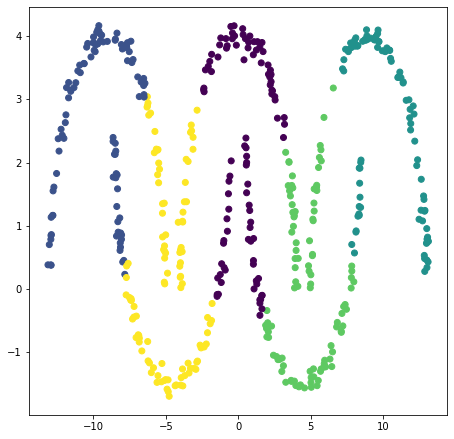

In [235]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_a)
labels = kmeans.labels_
plt.figure()
plt.scatter(data_a[:, 0], data_a[:, 1], c=labels)
plt.show()
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_b)
labels = kmeans.labels_
plt.figure()
plt.scatter(data_b[:, 0], data_b[:, 1], c=labels)
plt.show()
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_c)
labels = kmeans.labels_
plt.figure()
plt.scatter(data_c[:, 0], data_c[:, 1], c=labels)
plt.show()

## 2d: Agglomerative Clustering using sklearn

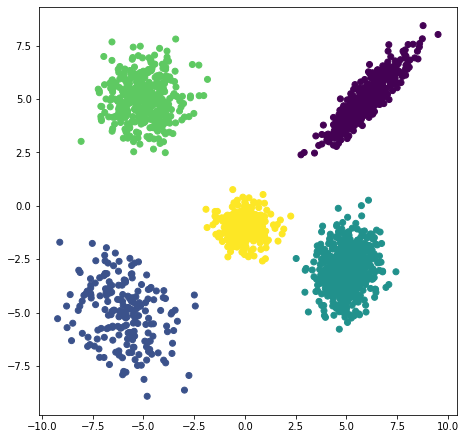

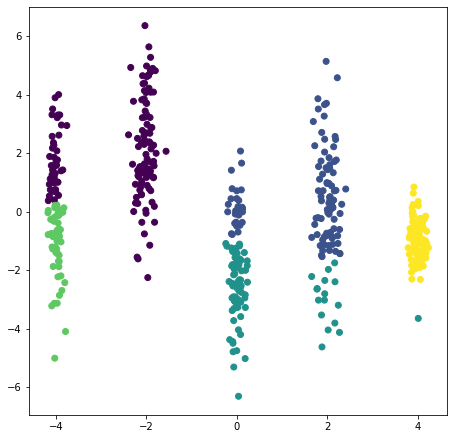

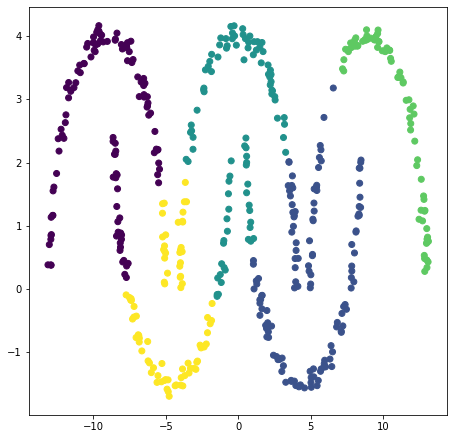

In [236]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean').fit(data_a)
labels = clustering.labels_
plt.figure()
plt.scatter(data_a[:, 0], data_a[:, 1], c=labels)
plt.show()
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean').fit(data_b)
labels = clustering.labels_
plt.figure()
plt.scatter(data_b[:, 0], data_b[:, 1], c=labels)
plt.show()
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean').fit(data_c)
labels = clustering.labels_
plt.figure()
plt.scatter(data_c[:, 0], data_c[:, 1], c=labels)
plt.show()

## 2e: Discussion

1.) <br>
Data Set A: KMeans = Spectral (1 or 2 or 5 eigenvectors)= Agglomerative <br>
Data Set B: Spectral (2 eigenvectors) > Agglomerative > KMeans <br>
Data Set C: Agglomerative > Spectral (5 eigenvectors) > Kmeans <br>
<br>
Throughout multiple tests, the clustering methods all seem deterministic. The ranking above shows the conclusion based on the performances for 8 runs. In data set A, the clusters are easily identified using whichever methods, I think this is mainly because the edge weights connecting the clusters can easily be distinguished from internal connections. In Spectral Clustering however, I still do not see the benefits of using more or less number of eigenvectors. As shown in data set B and C, no amount of eigenvectors were able to correctly distinguish between the clusters in the data set. I was also surprised to see Agglomerative Clustering perform better in more convoluted point clouds like in data set C, and how ineffective KMeans was in data B, I guess it was not distinguished enough for the clustering algorithm to classify. <br>
<br>
2.) <br>
If labels were provided for each cluster, I think it is possible to use SVM to classify these datasets in conjunction with "One-Versus-All" method. Drawing experience from previous homework, we can form a boundary through the "rbf" kernel that closely matches the contour of our data. However, I think the risk is that some of the vertices are so close that SVM might have a problem forming a significant margin, hence it might lead to overfitting if we were to use this classified model for other predictions.